In [1]:
import numpy as np
from src import jPCA
import matplotlib.pyplot as plt

from scipy.io import loadmat

In [2]:
fs = 50000
fs_ms = 50
pre_ms = 1
post_ms = 10

In [ ]:
psort_filename = 'all_cs_waveform.mat'
data = loadmat(psort_filename)

In [75]:
w = np.array(data['all_cs_waveform'][4][0])

################################## jPCA

# soft normalize
soft_normalize = 100
w_range = np.max(w, axis=(0,1)) - np.min(w, axis=(0,1))
w /= (w_range + soft_normalize)
# demean
cc_mean = np.mean(w, axis=0, keepdims=True)
w -= cc_mean

# get w_dot
w_dot = np.diff(w,axis=0)
w = w[:-1,:]

# calculate skew matrix
M_opt = jPCA.regression.skew_sym_regress(w, w_dot,tol=5e-7)

# calculate jPC
num_jpcs = 6
D, _ = M_opt.shape
eigvals, eigvecs = np.linalg.eig(M_opt)
idx = np.argsort(np.abs(np.imag(eigvals)))[::-1]
eigvecs = eigvecs[:, idx]
eigvals = eigvals[idx]
jpca_basis = np.zeros((D, num_jpcs))
for k in range(0, num_jpcs, 2):
    # One eigenvalue will have negative imaginary component,
    # the other will have positive imaginary component.
    if np.imag(eigvals[k]) > 0:
        v1 = eigvecs[:, k] + eigvecs[:, k+1]
        v2 = -np.imag(eigvecs[:, k] - eigvecs[:, k+1])
    else:
        v1 = eigvecs[:, k] + eigvecs[:, k+1]
        v2 = -np.imag(eigvecs[:, k+1] - eigvecs[:, k])

    V = np.real(np.column_stack((v1, v2))) / np.sqrt(2)
    jpca_basis[:, k:k+2] = V

# project on jPC
proj = w @ jpca_basis
var_capt = np.var(proj, axis=(0,1))


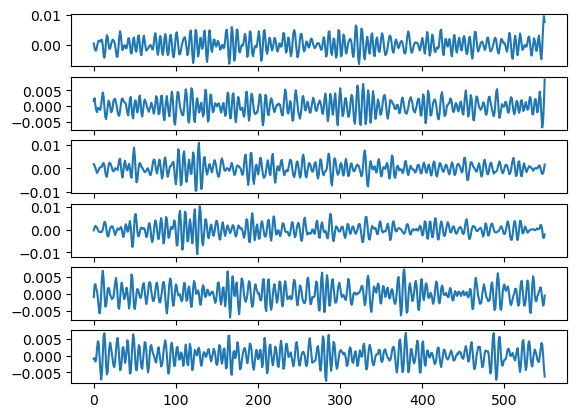

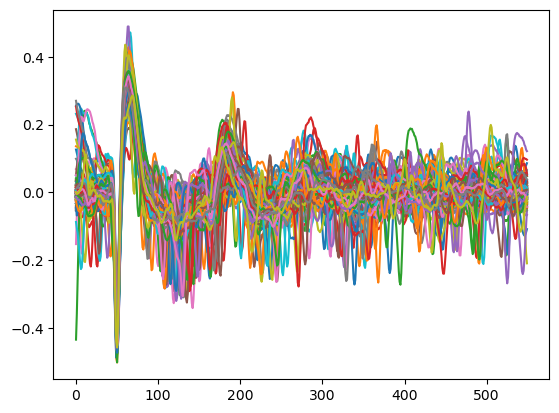

In [76]:
plt.figure()
for i in range(num_jpcs):
    plt.subplot(num_jpcs,1,i+1)
    plt.plot(proj[:,i])

plt.figure()
for i in range(w.shape[1]):
    plt.plot(w[:,i])

In [32]:
print('debug')

debug
